## Airbnb Data Analysis - Munich
This project aims to analyze the data from an Airbnb dataset. This dataset is public and provided by Airbnb through the project called [*Inside Airbnb*](https://insideairbnb.com/). The dataset covers the 2<sup>nd</sup> quarter of 2024 and details accommodations in Munich, Germany.

### Data Acquisition
This section is meant to import the data that will be analyzed. 

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
# import the dataset to a dataframe
df = pd.read_csv("listings_munich-2quarter2024.csv")

### Data Analysis
#### 1 - Get familiar to the dataset 

The first step to begin the data exploration is to get familiar with the dataset. To do so, the *head()* method from Pandas is used to display the first 5 entries of the dataset along with its variables. The variables of this dataset are listed below:
* `id` - identification number for each accommodation
* `name` - accomodation's name
* `host_id` - identification number of the host
* `host_name` - name of the host
* `neighbourhood_group` - regions of the city (empty series)
* `neighbourhood` - accomodation's neighbourhood
* `latitude` - accomodation's latitude
* `longitude` - accomodation's longitude
* `room_type` - type of the room
* `price` - price for one night
* `minimum_nights` - minimum number of nights allowed to book
* `number_of_reviews` - number of reviews received
* `last_review` - date of the last review received
* `reviews_per_month` - number of reviews received each month
* `calculated_host_listings_count` - number of accomodations listed on Airbnb by the same host
* `availability_365` - amount of days available whitin 365 days
* `number_of_reviews_ltm` - number of reviews in the last 12 months
* `license` - N/A


In [20]:
# first 5 inputs of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11492,11.48954,Entire home/apt,95.0,2,127,2019-10-03,0.82,2,200,0,NaN
1,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.12071,11.63758,Entire home/apt,105.0,2,69,2024-06-22,0.44,3,108,12,NaN
2,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15199,11.56482,Entire home/apt,NaN,3,112,2024-02-04,0.70,1,0,5,NaN
3,159634,"Fancy, bright central roof top flat and homeof...",765694,Susana,NaN,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,76.0,4,40,2024-05-28,0.26,1,12,4,NaN
4,170154,"Own floor & bath, parking & breakfast",108297,Alex,NaN,Sendling-Westpark,48.10814,11.52733,Private room,70.0,3,559,2024-06-21,3.60,1,123,27,NaN


#### 2 - Dataset size 

After the first look of the dataset it is important to know the size of the dataset and also the type of the data as well as the amount of non-null elements per column.

In [28]:
print("Dataset size:",
      "\nNumber of entries:", df.shape[0],
      "\nNumber of columns/variables:", df.shape[1],
      "\n=============================================================")

# a more general approach to display those information
df.info()

Dataset size: 
Number of entries: 6746 
Number of columns/variables: 18 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6746 entries, 0 to 6745
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6746 non-null   int64  
 1   name                            6746 non-null   object 
 2   host_id                         6746 non-null   int64  
 3   host_name                       6745 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6746 non-null   object 
 6   latitude                        6746 non-null   float64
 7   longitude                       6746 non-null   float64
 8   room_type                       6746 non-null   object 
 9   price                           4634 non-null   float64
 10  minimum_nights                  6746 non-null   int64  
 11  number_of_reviews     

#### 3 - Null values 

As can be seen on the last output, some columns have null values. Therefore, it is a important to understand whether the number of null values are significant compared to the total number of entries.

In [35]:
print("Percentage of null values by columns:")
round(df.isnull().sum() / df.shape[0] * 100, 2).sort_values(ascending=False)

Percentage of null values by columns:


neighbourhood_group               100.00
license                            99.39
price                              31.31
last_review                        21.03
reviews_per_month                  21.03
host_name                           0.01
host_id                             0.00
neighbourhood                       0.00
latitude                            0.00
longitude                           0.00
room_type                           0.00
name                                0.00
minimum_nights                      0.00
number_of_reviews                   0.00
calculated_host_listings_count      0.00
availability_365                    0.00
number_of_reviews_ltm               0.00
id                                  0.00
dtype: float64

Except for the *price* column, the other columns with null values are not important, as they will not be the main subject of the analysis. Therefore, later, these columns will be removed from the dataset.
Regarding the *price* column, it is important to note that the price is related to the type of accommodation, number of rooms and location. Hence, using the average price or the median value of the price to fill the null values may not be the best approach. As the goal here is to conduct a simplified analysis, one alternative is to remove the entries with null values in the price column. However it should be noted that this will reduce the dataset by 31%.

#### 4 - Variables distribuition

In order to better understand and visualize the data, a good approach is to plot histograms of the variables.

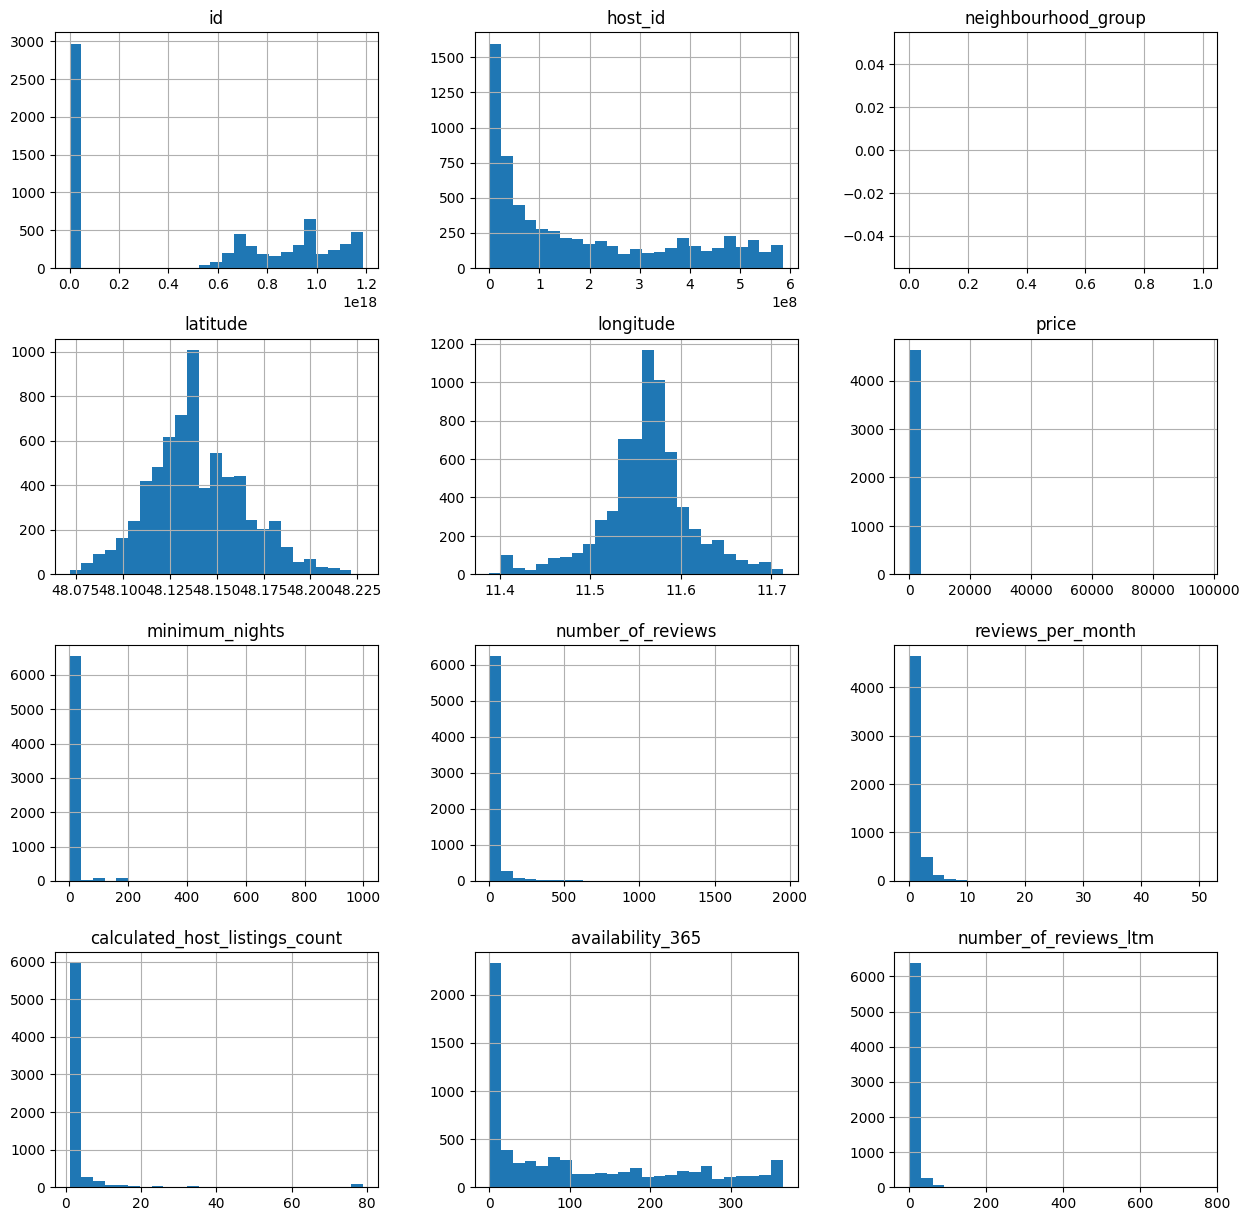

In [43]:
df.hist(bins=25,figsize=(15,15));